In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns

## Part A

In [2]:
# 1 Load the data
data = pd.read_csv("bottle.csv")
data.shape

/Users/arielsmac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(864863, 74)

In [3]:
# 2 Reduce dataset and remove NA values 
col_lst = ['T_degC','Salnty','STheta'] 
dat = data[col_lst]
dat = dat.dropna()
dat.shape

(812174, 3)

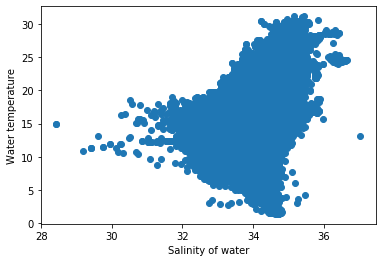

In [4]:
# 3 a) Scatter: Salnty (salinity of water) vs T_degC
plt.scatter(dat['Salnty'],dat['T_degC'])
plt.xlabel('Salinity of water')
plt.ylabel('Water temperature')
plt.show()

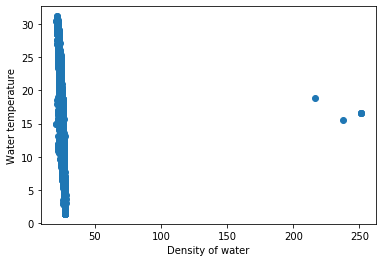

In [5]:
# 3 b) Scatter: STheta (density of water) vs T_degC
plt.scatter(dat['STheta'],dat['T_degC'])
plt.xlabel('Density of water')
plt.ylabel('Water temperature')
plt.show()

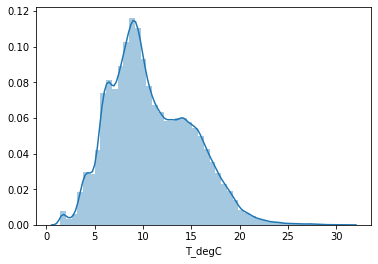

In [6]:
# a) Distribution of T_degC 
sns.distplot(dat['T_degC'])

In [7]:
# 5 Remove obvious outliers from step 3b
dat.drop(dat[dat['STheta'] >= 200].index, inplace = True)
dat.shape

(812168, 3)

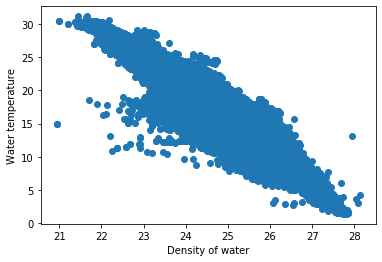

In [8]:
# 6 Plot 3b again 
plt.scatter(dat['STheta'],dat['T_degC'])
plt.xlabel('Density of water')
plt.ylabel('Water temperature')
plt.show()

The scatter plot after removing outliers looks better as it is more zoomed in and provide a better insight into the relationship between STheta and T_degC.  

## Part B

In [9]:
from sklearn.model_selection import train_test_split
# First separate the training data predictors and response 
y = dat['T_degC']
X = dat.drop(['T_degC'], axis=1)

# Set seed for reproducibility 
SEED = 3

# Split into train and test data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = SEED)

## Part C

In [10]:
# 1 Build the normal equation using numpy & fit using your training data (X_train & y_train)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [11]:
# 2 Print out the coefficients
theta_best

array([35.71239733,  3.10785104, -5.03690542])

In [12]:
# 3 Predict T_degC for the test data using the fitted values in b
X_new_b = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance
y_pred = X_new_b.dot(theta_best)
y_pred

array([12.24220422, 13.60551156,  4.91079733, ...,  4.82710026,
       17.30933233,  7.36849552])

In [13]:
# 4 Calculate the following for the test data: mean squared error, r-squared, explained variance
from sklearn import metrics 
# Mean Squared Error 
MSE = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
explained_var = metrics.explained_variance_score(y_test, y_pred)
print(MSE)
print(r2)
print(explained_var)

0.23206587713312993
0.9869280277725749
0.9869280277762907


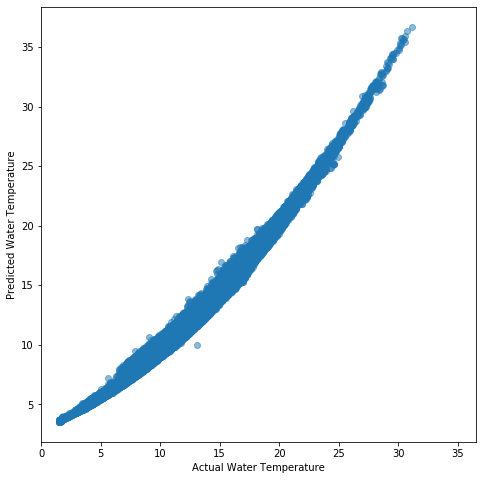

In [14]:
# 5 Create a scatterplot that shows actual versus predicted values for the T_degC
plt.figure(figsize=(16,8))
plt.scatter(x=y_test, y=y_pred, alpha = 0.5)
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')
plt.axis('square')
plt.show()

## Part D

In [15]:
# 1 Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# 2 Print out the coefficients (including the intercept)
lin_reg.intercept_, lin_reg.coef_

(35.71239732712169, array([ 3.10785104, -5.03690542]))

In [17]:
# 3 Predict T_degC for the test data using the fitted values in b
y_pred_sklearn = lin_reg.predict(X_test)
y_pred_sklearn

array([12.24220422, 13.60551156,  4.91079733, ...,  4.82710026,
       17.30933233,  7.36849552])

In [18]:
# 4 Calculate the following for the test data: mean squared error, r-squared, explained variance
MSE_sklearn = metrics.mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = metrics.r2_score(y_test, y_pred_sklearn)
explained_var_sklearn = metrics.explained_variance_score(y_test, y_pred_sklearn)
print(MSE_sklearn)
print(r2_sklearn)
print(explained_var_sklearn)

0.23206587713304366
0.9869280277725797
0.9869280277762955


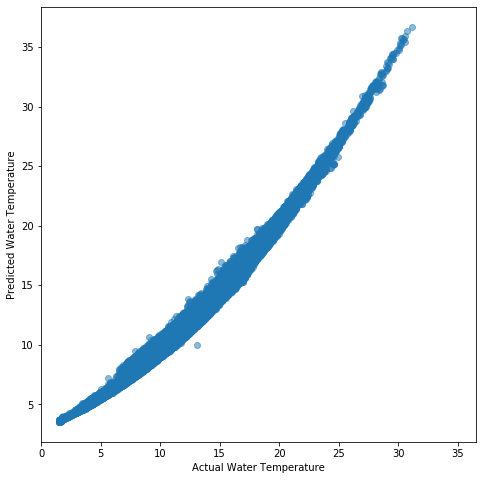

In [19]:
# 5 Create a scatterplot that shows actual versus predicted values for the T_degC.
plt.figure(figsize=(16,8))
plt.scatter(x = y_test, y = y_pred_sklearn, alpha = 0.5)
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')
plt.axis('square')
plt.show()

## Part E

1) Why is it important to have a test set?

The data in the test set are not learned by our machine learning model, so when we fit our model that learned from the training data and make predicitions with the test data, we can assess how well our model fits. Depending on the model, we could either experience overfitting or underfitting. 

2) If the normal equation always provides a solution, when would we not want to use it?

We wouldn't want to use the normal equation when we have a large number of features. The computational complexity of inverting a matrix would significantly increase the computation time. Additionally, we should avoid using the normal equation if we are performing online learning and introducing new training data to the model, since the normal equation does not support iterative parameter updates. 

3) How might we improve the fit of our models from Part C & D? Note: There are lots of possible answers to this section - just describe one in detail. 

We can add an interaction term to see how STheta and Salnty together impact the water temperature. This can be achieved by performing sklearn.preprocessing.PolynomialFeatures(interaction_only=True) followed by fit_transform of X data before we fit the linear regression model. 

4) As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 

Bias is the part of the generalization error that tells you, on average, how much the prediction is different from the true value. A high-bias model is likley to underfit the training data. 

Variance is the part of the generalization error that tells you how much the prediction is inconsistent over different training sets, caused by the model's excessive sensitivity to small variation in the triaing data. A high-variance model is likely to overfit the training data. 

5) In a linear regression model, how might we reduce bias?

We can increase the model's complexity to reduce bias. In the case of linear regression, that means we can gather more relevant features as well as add more variables to the model.  

6) In a linear regression model, how might we reduce variance? 

We can decrease the model's complexity to reduce variance. For a linear regression model, we can gather more training data or remove some variables from the model. 